# Классификатор для спектрограмм

In [2]:
import pandas as pd
import cv2
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
from numpy import genfromtxt

## Загрузка спектрограмм

In [3]:
# Путь к спектрограммам
path_table = Path("/home/jupyter/BioHack2019_machine_hearing/data/tables/")

In [29]:
file_names = os.listdir(path_table)

In [30]:
# Путь к изображением (куда сохранить)
path_imgs = Path("/home/jupyter/BioHack2019_machine_hearing/data/img/")
fnames = get_image_files(path_imgs)

In [32]:
len(fnames)

185

## Обработка изображений

In [33]:
# Перевод спектрограмм в изображения
for names in file_names:
    data = genfromtxt('data/tables/' + names, delimiter=',')
    data = np.array(data[:,:300])
    data_resize = cv2.resize(data, (300, 300))
    cv2.imwrite(f"data/img/{names}.jpg", data_resize);

In [34]:
# подготовка изображений и их разметка, по названию
tfms = get_transforms(do_flip=False)
pat = r'/(\w+)_\d+\.jpg$'
data = ImageDataBunch.from_name_re(path_imgs, fnames, pat=pat, size=300, num_workers=4)

In [35]:
# используемые классы
data.classes

['ae', 'iy']

## Обучение

In [63]:
# создаем сеть resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=True)

In [64]:
learn.fit_one_cycle(4)
learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate
1,0.932752,0.659297,0.378378
2,0.655195,0.861921,0.567568
3,0.463607,0.945103,0.513514
4,0.360177,0.817311,0.513514


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06


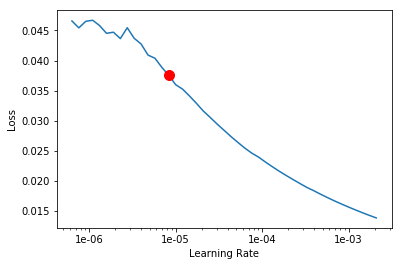

In [65]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(4, max_lr=slice(8.32E-06,1e-4))
learn.save('stage-2_n')

epoch,train_loss,valid_loss,error_rate
1,0.087104,0.652553,0.432432
2,0.069038,0.511040,0.270270
3,0.051422,0.408672,0.162162
4,0.040367,0.365146,0.081081


In [74]:
learn.load("stage-2_n")

Learner(data=ImageDataBunch;

Train: LabelList (148 items)
x: ImageItemList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
ae,iy,iy,ae,iy
Path: /home/jupyter/BioHack2019_machine_hearing/data/img;

Valid: LabelList (37 items)
x: ImageItemList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
iy,iy,ae,iy,ae
Path: /home/jupyter/BioHack2019_machine_hearing/data/img;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

## Пример использования

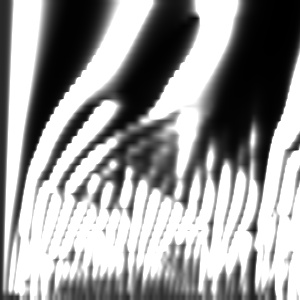

In [68]:
img = open_image(path_imgs/'iy_40.jpg')
img

In [69]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category iy